In [1]:
import numpy as np 
import matplotlib.pylab as plt 

# our script
from prediction import emuPredict
import config as CONFIG
from src.cosmology import PowerSpectrum
from utils.helpers import interpolate 

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20 

In [2]:
cosmology = {'Omega_cdm': 0.25, 'Omega_b': 0.04, 'h': 0.70, 'n_s': 1.0, 'sigma8': 0.75}
redshift = 0.25

### Using Emulator

In [3]:
emulator = emuPredict(nlhs=500)

In [4]:
%%time
pklin_emu, pklin_var = emulator.calculate_pklin(redshift, cosmology, return_var=True)

CPU times: user 518 ms, sys: 1.27 ms, total: 520 ms
Wall time: 93.5 ms


In [5]:
nsigma = 3.0 
sigma = np.sqrt(pklin_var)
pklin_upper = pklin_emu + nsigma * sigma
pklin_lower = pklin_emu - nsigma * sigma

### Using CLASS

In [6]:
module = PowerSpectrum(CONFIG.Z_MIN, CONFIG.Z_MAX, CONFIG.K_MIN, CONFIG.K_MAX)

In [7]:
%%time
pklin_class = module.pk_linear(cosmology, redshift)

CPU times: user 35.8 s, sys: 23.4 ms, total: 35.8 s
Wall time: 5.5 s


### Interpolator

In [8]:
wavenumbers_new = np.geomspace(CONFIG.K_MIN, CONFIG.K_MAX, 1000)
p_class = interpolate([emulator.wavenumber, pklin_class, wavenumbers_new])
p_gp = interpolate([emulator.wavenumber, pklin_emu, wavenumbers_new])
p_gp_upper = interpolate([emulator.wavenumber, pklin_upper, wavenumbers_new])
p_gp_lower = interpolate([emulator.wavenumber, pklin_lower, wavenumbers_new])

### Plotting

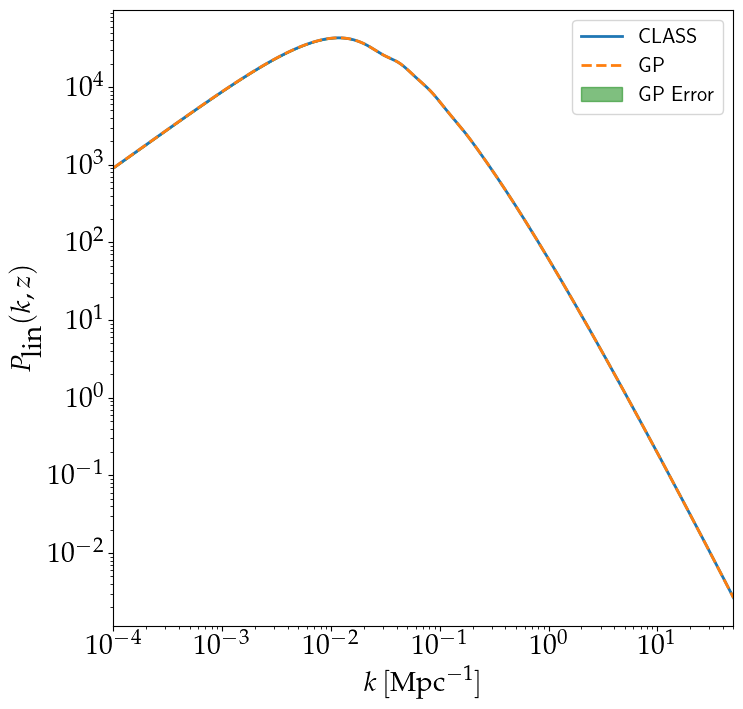

In [9]:
plt.figure(figsize = (8,8))
plt.loglog(wavenumbers_new, p_class, lw = 2, label = 'CLASS')
plt.loglog(wavenumbers_new, p_gp, lw = 2, label = 'GP', linestyle = '--')
plt.fill_between(wavenumbers_new, p_gp_lower, p_gp_upper, color = 'g', alpha = 0.5, label = 'GP Error')
plt.xlim(module.k_min, module.k_max)
plt.ylabel(r'$P_{\textrm{lin}}(k,z)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()